In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
housing_train = pd.read_csv("train.csv")
housing_test = pd.read_csv("test.csv")
housing_data = housing_train.append(housing_test, sort=False)

In [3]:
pd.set_option('display.max_columns', None)
#housing_data.info()

In [4]:
housing_data["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

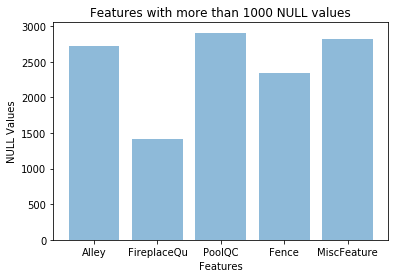

In [5]:
features = []
nullValues = []
for i in housing_data:
    if (housing_data.isna().sum()[i])>1000 and i!='SalePrice':
        features.append(i)
        nullValues.append(housing_data.isna().sum()[i])
y_pos = np.arange(len(features)) 
plt.bar(y_pos, nullValues, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('NULL Values')
plt.xlabel('Features')
plt.title('Features with more than 1000 NULL values')
plt.show()


In [6]:
housing_data = housing_data.dropna(axis=1, how='any', thresh=1000)
housing_data = housing_data.fillna(housing_data.mean())
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,21.312345,7886.996359,1.409947,1.113131,30.291442,20.894344,178.626089,455.532750,169.176615,439.468337,440.690726,392.362079,428.701456,46.396825,506.051045,0.524556,0.245603,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,24.867762,0.761494,215.357904,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,56174.332503
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,60.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,163000.000000
50%,1460.000000,50.000000,69.305795,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,369.000000,0.000000,467.000000,990.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.113406,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,180921.195890
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,180921.195890
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [7]:
housing_data = pd.get_dummies(housing_data)
corr_matrix = housing_data.corr()
#corr_matrix['SalePrice'].sort_values(ascending=False)

In [8]:
listOfFea = [i for i in corr_matrix]
FeaTobeDropped = set() #features that are correlated to each other
for i in range(len(listOfFea)):
    for j in range(i+1,len(listOfFea)):
        f1 = listOfFea[i]
        f2 = listOfFea[j]
        if abs(corr_matrix[f1][f2] > 0.8):
            FeaTobeDropped.add(f1)
final_data = housing_data.drop(FeaTobeDropped, axis=1) 


In [9]:
noCRwo = [col for col in final_data if abs(final_data[col].corr(final_data['SalePrice'])) < 0.045 ] 
#Drop features that are not correlated with output
final_data = final_data.drop(noCRwo, axis=1)

In [10]:
#seperate the data
train_set = final_data.iloc[0:1460]
test_set = final_data.iloc[1460:]

In [11]:
#Training data 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
house_train_set = train_set.drop("SalePrice", axis=1)
house_train_set_labels = np.log1p(train_set["SalePrice"])
model.fit(house_train_set, house_train_set_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Predict on test data 
new_test_set = test_set.drop("SalePrice", axis=1)
pred_values = np.expm1(model.predict(new_test_set))

In [13]:
tested_Dframe = pd.DataFrame()
tested_Dframe['Id'] = housing_test['Id']
tested_Dframe['SalePrice'] = pred_values
tested_Dframe.to_csv("submission.csv", index=False)
tested_Dframe

,Id,SalePrice
0,1461,123058.852351
1,1462,152855.952899
2,1463,174151.521974
3,1464,195548.528428
4,1465,209052.859514
5,1466,168311.936528
6,1467,181066.197203
7,1468,168406.280931
8,1469,186257.225627
9,1470,114564.539152
